# I. NẠP CÁC THƯ VIỆN CẦN NẠP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns
import time
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})

# II. ĐƯA DỮ LIỆU VÀO VÀ ĐỌC DỮ LIỆU

In [ ]:
# Đọc dữ liệu và tạo DataFrame
url = "https://docs.google.com/spreadsheets/d/1HxhDT99vRKJSjO0uU_yzhCbKIlz175tNxemu7yjpb4A/export?format=csv"
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#III. CLEAN DATA , LOẠI BỎ DỮ LIỆU KHÔNG CẦN THIẾT

In [ ]:
# Xóa cột 'ID' vì đó chỉ là tên rượu nên không cần thiết để đánh giá rượu
df.drop('Id', axis=1, inplace=True)

In [ ]:
#kiểm tra lại sau khi xoá cột "Id"
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# IV. XÁC ĐỊNH CỘT CẦN DỰ ĐOÁN TÌM HIỂU VỀ DỮ LIỆU QUA VISUALLISATION

In [ ]:
# Đếm các giá trị trong cột 'quality'
quality_counts = df['quality'].value_counts().sort_index()

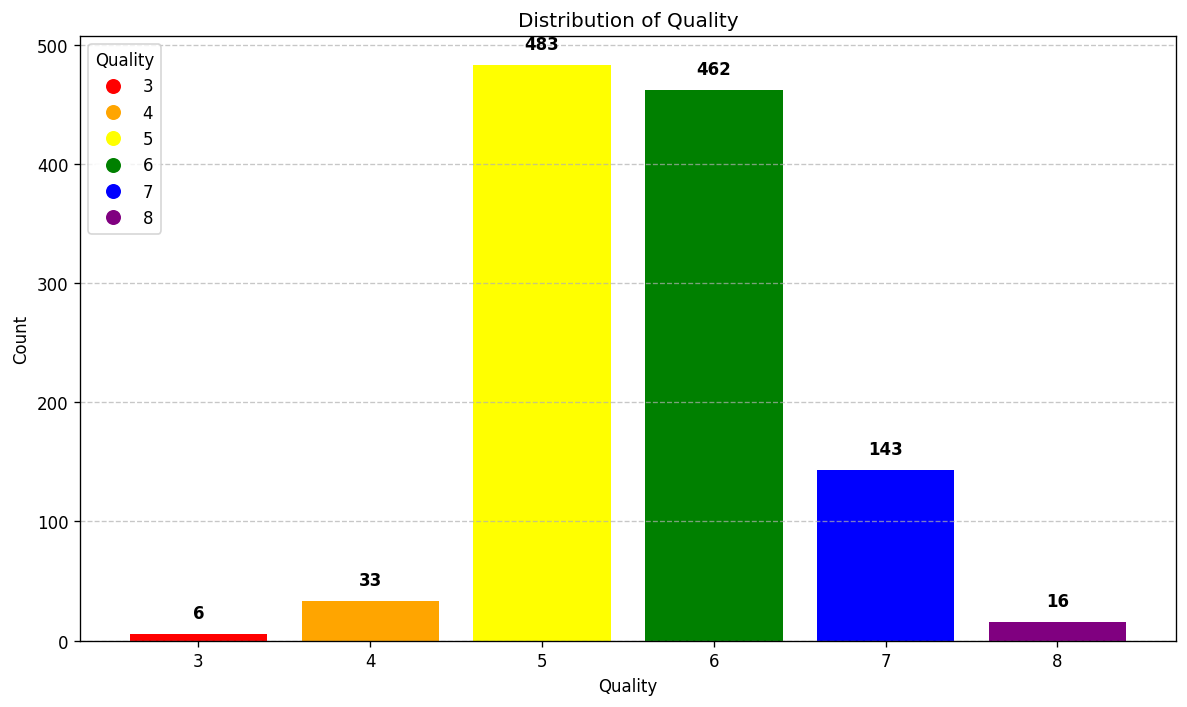

In [ ]:
# Màu sắc tương ứng với từng giá trị quality
color_map = {3: 'red', 4: 'orange', 5: 'yellow', 6: 'green', 7: 'blue', 8: 'purple', 9: 'brown'}

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(quality_counts.index, quality_counts.values, color=[color_map[i] for i in quality_counts.index])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')
plt.xticks(quality_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng mẫu lên trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', color='black', weight='bold')

# Thêm thanh màu sắc tương ứng với giá trị quality
color_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=str(i)) for i in quality_counts.index]
plt.legend(handles=color_patches, title='Quality', loc='upper left')

plt.tight_layout()
plt.show()

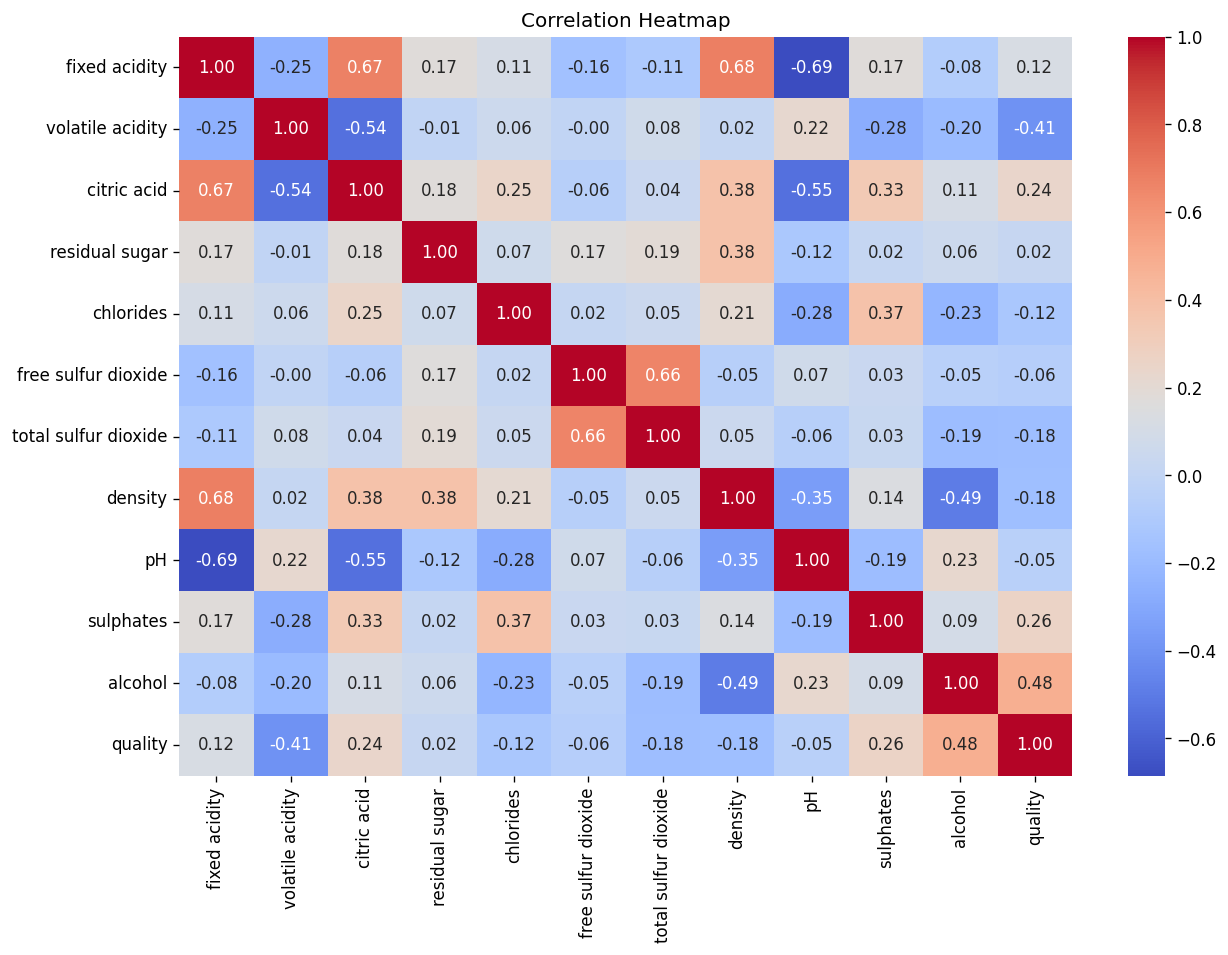

In [ ]:
# Tính ma trận tương quan
correlation_matrix = df.corr()

# Vẽ biểu đồ tương quan dưới dạng heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

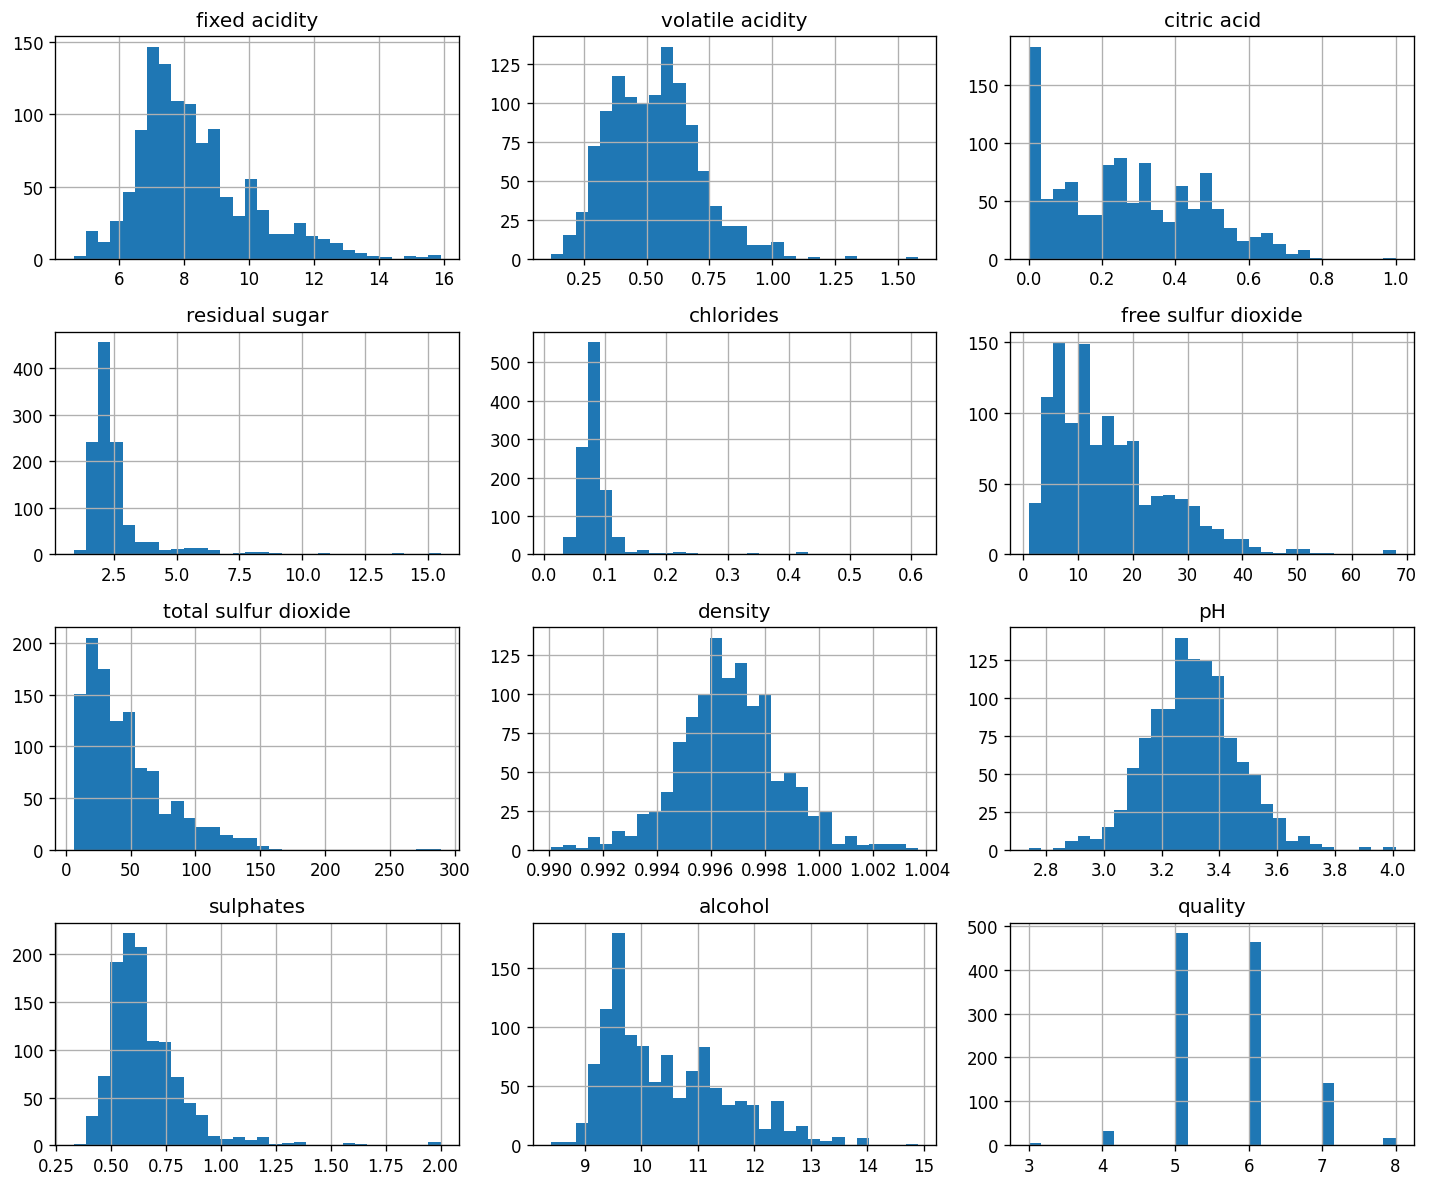

In [ ]:
# Vẽ biểu đồ phân phối của các thuộc tính
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# V. XÂY DƯNG MÔ HÌNH

In [ ]:
# Chỉ giữ lại 5 cột có tương quan cao nhất với 'quality'
selected_columns = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']
X = df[selected_columns]
y = df["quality"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
y_true = y_test

In [ ]:
# Kiểm tra kích thước của các tập dữ liệu
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (800, 5) (800,)
Test data: (343, 5) (343,)


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Mô hình Linear Regression Model

In [ ]:
# Khởi tạo mô hình hồi quy tuyến tính
start_time_lr = time.time()
lr_model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr_model.fit(X_train, y_train)
end_time_lr = time.time()

# Dự đoán trên tập kiểm tra
y_pred_lr = lr_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# In kết quả đánh giá
print('Linear Regression Model:')
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")
print(f"Execution Time: {end_time_lr - start_time_lr:.2f} seconds")
print()

Linear Regression Model:
RMSE: 0.61
MAE: 0.49
MSE: 0.37
R-squared: 0.40
Execution Time: 0.03 seconds



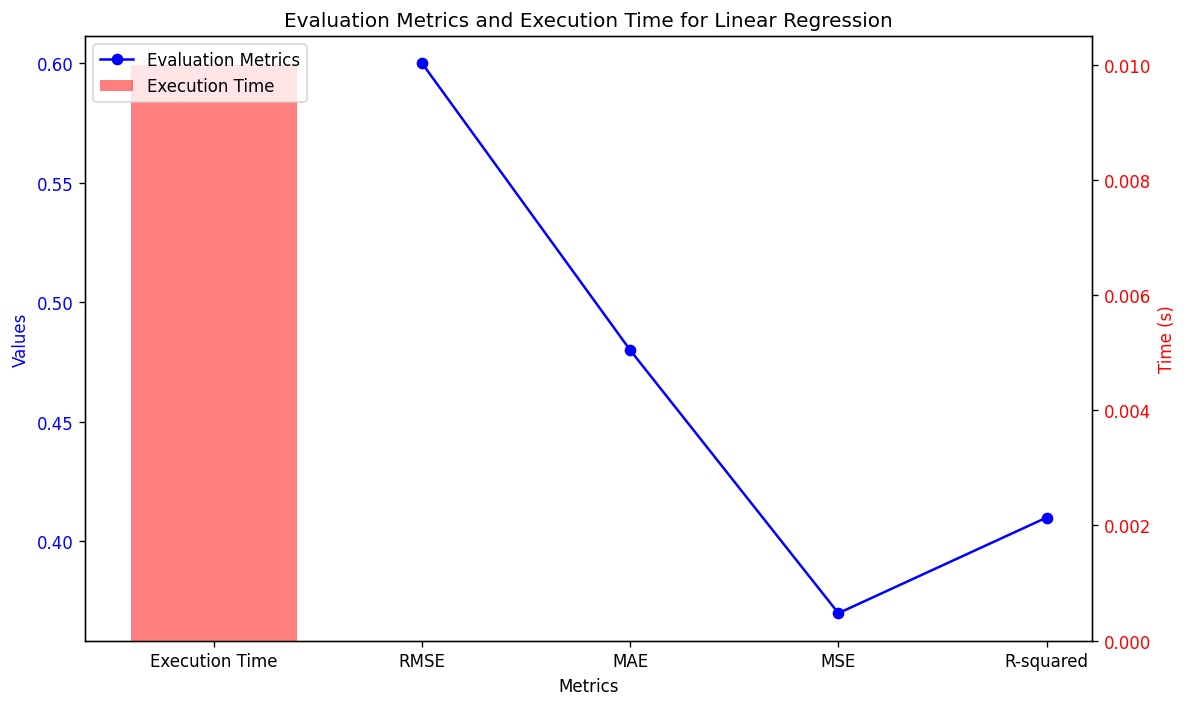

In [ ]:
# Các thông số đánh giá mô hình
rmse_lr = 0.60
mae_lr = 0.48
mse_lr = 0.37
r2_lr = 0.41
execution_time_lr = 0.01

# Tên các chỉ số đánh giá
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared']

# Giá trị của các chỉ số đánh giá
values = [rmse_lr, mae_lr, mse_lr, r2_lr]

# Thời gian thực thi
execution_time = [execution_time_lr]

# Tạo biểu đồ dòng
fig, ax1 = plt.subplots()

# Biểu đồ dòng cho các chỉ số đánh giá
ax1.plot(metrics, values, marker='o', color='b', label='Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Biểu đồ cột cho thời gian thực thi
ax2 = ax1.twinx()
ax2.bar('Execution Time', execution_time, color='r', alpha=0.5, label='Execution Time')
ax2.set_ylabel('Time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Tiêu đề biểu đồ
plt.title('Evaluation Metrics and Execution Time for Linear Regression')

# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

2. Mô hình Decision Tree Regression

In [ ]:
# Khởi tạo mô hình Decision Tree Regression
start_time_dtr = time.time()
dtr_model = DecisionTreeRegressor()

# Huấn luyện mô hình trên tập huấn luyện
dtr_model.fit(X_train, y_train)
end_time_dtr = time.time()

# Dự đoán trên tập kiểm tra
y_pred_dtr = dtr_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
r2_dtr = r2_score(y_test, y_pred_dtr)

# In kết quả đánh giá
print('Decision Tree Regression:')
print(f"RMSE: {rmse_dtr:.2f}")
print(f"MAE: {mae_dtr:.2f}")
print(f"MSE: {mse_dtr:.2f}")
print(f"R-squared: {r2_dtr:.2f}")
print(f"Execution Time: {end_time_dtr - start_time_dtr:.2f} seconds")
print()

Decision Tree Regression:
RMSE: 0.90
MAE: 0.56
MSE: 0.81
R-squared: -0.31
Execution Time: 0.01 seconds



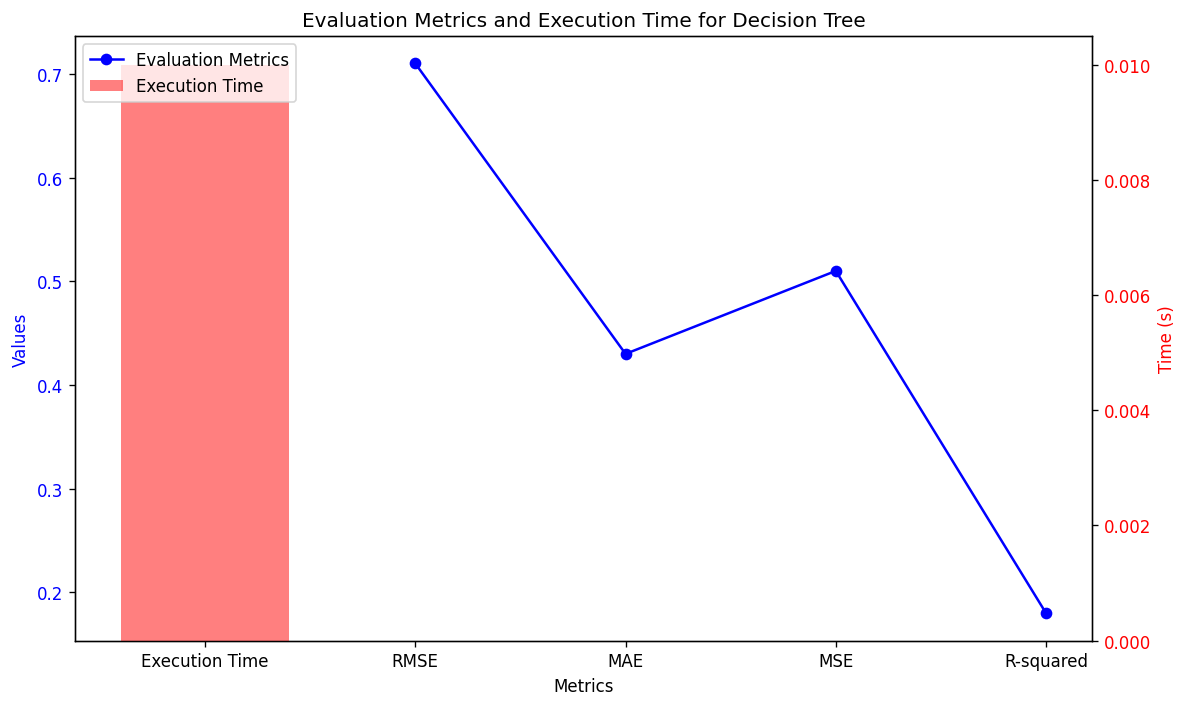

In [ ]:
# Các thông số đánh giá mô hình Decision Tree
rmse_dt = 0.71
mae_dt = 0.43
mse_dt = 0.51
r2_dt = 0.18
execution_time_dt = 0.01

# Tạo biểu đồ dòng và cột tương tự như trên
fig, ax1 = plt.subplots()
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared']
values = [rmse_dt, mae_dt, mse_dt, r2_dt]
execution_time = [execution_time_dt]

ax1.plot(metrics, values, marker='o', color='b', label='Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar('Execution Time', execution_time, color='r', alpha=0.5, label='Execution Time')
ax2.set_ylabel('Time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Evaluation Metrics and Execution Time for Decision Tree')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

3. Mô hình Random Forest Regression

In [ ]:
# Khởi tạo mô hình Random Forest Regression
start_time_rfr = time.time()
RFR = RandomForestRegressor(n_estimators=100)

# Huấn luyện mô hình trên tập huấn luyện
RFR.fit(X_train, y_train)
end_time_rfr = time.time()

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
y_pred_RFR = RFR.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_RFR)

# Tính toán sai số bình phương trung bình
mse_rfr = mean_squared_error(y_test, y_pred_RFR)

# Tính toán căn bậc hai của sai số bình phương trung bình
rmse_rfr = mean_squared_error(y_test, y_pred_RFR, squared=False)

# R-Squared
r2_rfr = r2_score(y_true, y_pred_RFR)

# In kết quả đánh giá
print('Random Forest Regression:')
print(f"RMSE: {rmse_rfr:.2f}")
print(f"MAE: {mae_rfr:.2f}")
print(f"MSE: {mse_rfr:.2f}")
print(f"R-squared: {r2_rfr:.2f}")
print(f"Execution Time: {end_time_rfr - start_time_rfr:.2f} seconds")
print()

Random Forest Regression:
RMSE: 0.59
MAE: 0.45
MSE: 0.34
R-squared: 0.44
Execution Time: 0.52 seconds



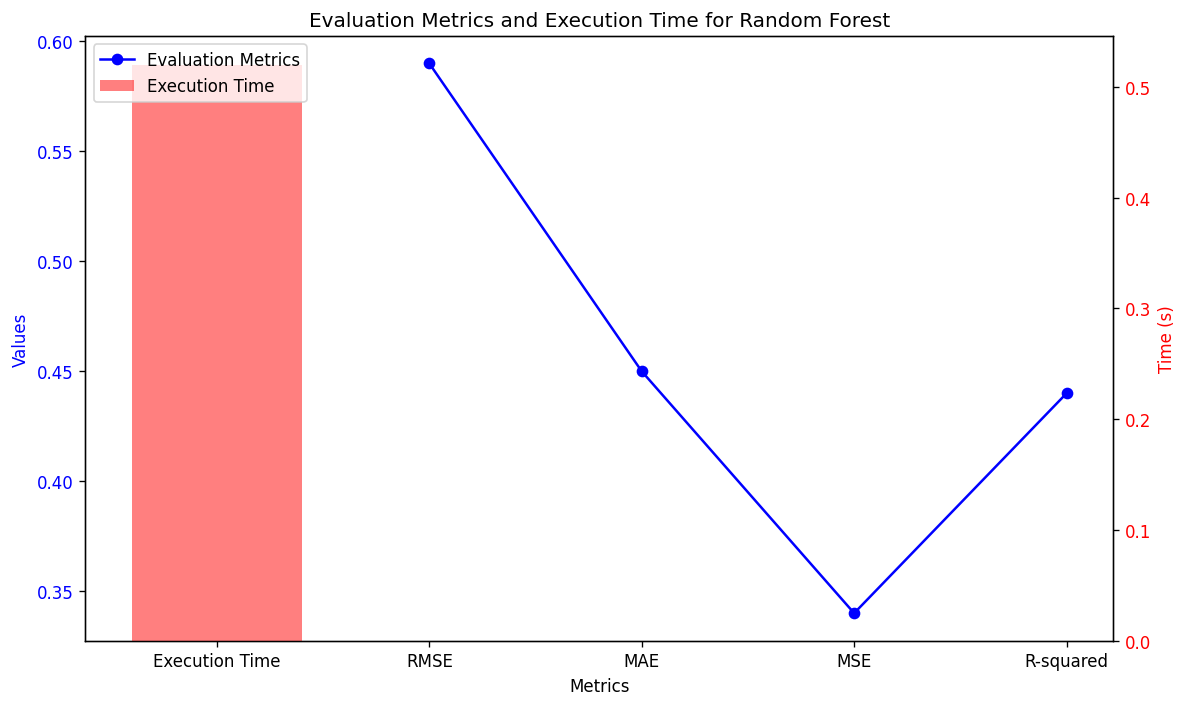

In [ ]:
# Các thông số đánh giá mô hình Random Forest
rmse_rf = 0.59
mae_rf = 0.45
mse_rf = 0.34
r2_rf = 0.44
execution_time_rf = 0.52

# Tạo biểu đồ dòng và cột tương tự như trên
fig, ax1 = plt.subplots()
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared']
values = [rmse_rf, mae_rf, mse_rf, r2_rf]
execution_time = [execution_time_rf]

ax1.plot(metrics, values, marker='o', color='b', label='Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar('Execution Time', execution_time, color='r', alpha=0.5, label='Execution Time')
ax2.set_ylabel('Time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Evaluation Metrics and Execution Time for Random Forest')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

4. Mô hình KNN Regression

In [ ]:
# Khởi tạo mô hình KNN Regression
start_time_knn = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5)

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)
end_time_knn = time.time()

# Dự đoán trên tập kiểm tra
y_pred_knn = knn_model.predict(X_test)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Tính toán sai số bình phương trung bình
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Tính toán căn bậc hai của sai số bình phương trung bình
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

# R-Squared
r2_knn = r2_score(y_test, y_pred_knn)

# In kết quả đánh giá
print('KNN Regression:')
print(f"RMSE: {rmse_knn:.2f}")
print(f"MAE: {mae_knn:.2f}")
print(f"MSE: {mse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")
print(f"Execution Time: {end_time_knn - start_time_knn:.2f} seconds")
print()

KNN Regression:
RMSE: 0.73
MAE: 0.56
MSE: 0.53
R-squared: 0.14
Execution Time: 0.01 seconds



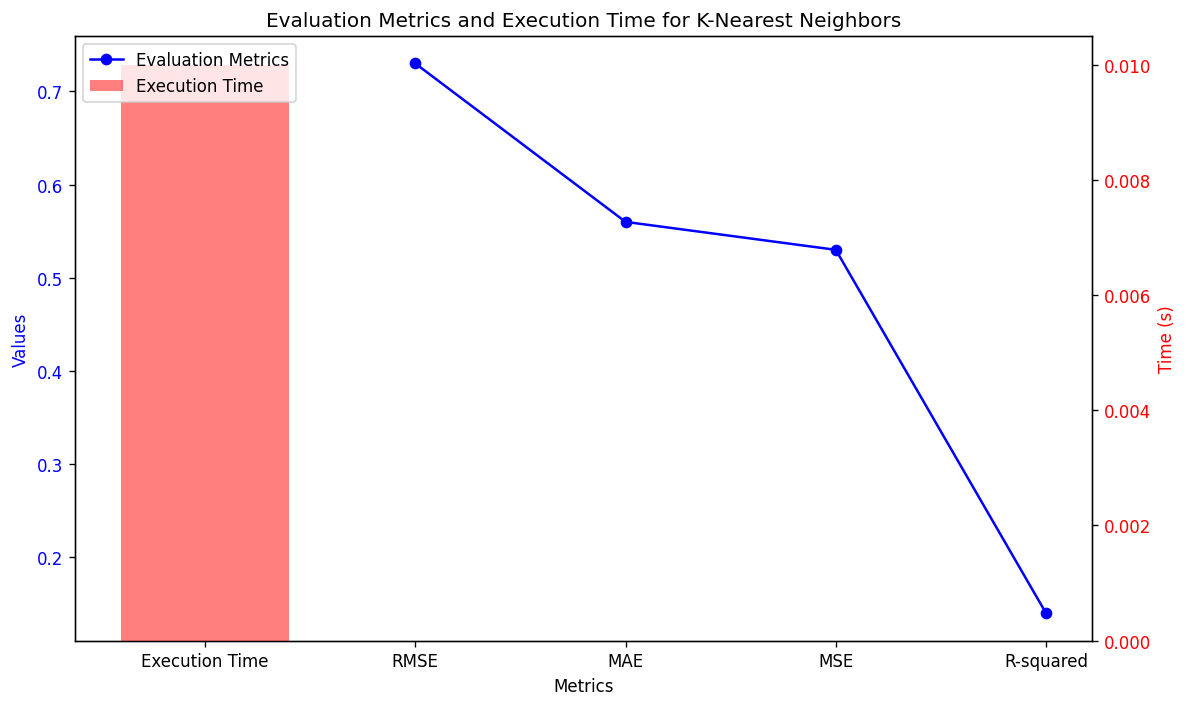

In [ ]:
# Các thông số đánh giá mô hình K-Nearest Neighbors
rmse_knn = 0.73
mae_knn = 0.56
mse_knn = 0.53
r2_knn = 0.14
execution_time_knn = 0.01

# Tạo biểu đồ dòng và cột tương tự như trên
fig, ax1 = plt.subplots()
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared']
values = [rmse_knn, mae_knn, mse_knn, r2_knn]
execution_time = [execution_time_knn]

ax1.plot(metrics, values, marker='o', color='b', label='Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar('Execution Time', execution_time, color='r', alpha=0.5, label='Execution Time')
ax2.set_ylabel('Time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Evaluation Metrics and Execution Time for K-Nearest Neighbors')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

5. Mô hình SVM Regression

In [ ]:
# Khởi tạo mô hình SVM Regression
start_time_svm = time.time()
svm_model = SVR()

# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)
end_time_svm = time.time()

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Tính toán sai số bình phương trung bình
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Tính toán căn bậc hai của sai số bình phương trung bình
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)

# R-Squared
r2_svm = r2_score(y_test, y_pred_svm)

# In kết quả đánh giá
print('SVM Regression:')
print(f"RMSE: {rmse_svm:.2f}")
print(f"MAE: {mae_svm:.2f}")
print(f"MSE: {mse_svm:.2f}")
print(f"R-squared: {r2_svm:.2f}")
print(f"Execution Time: {end_time_svm - start_time_svm:.2f} seconds")
print()

SVM Regression:
RMSE: 0.71
MAE: 0.54
MSE: 0.50
R-squared: 0.19
Execution Time: 0.05 seconds



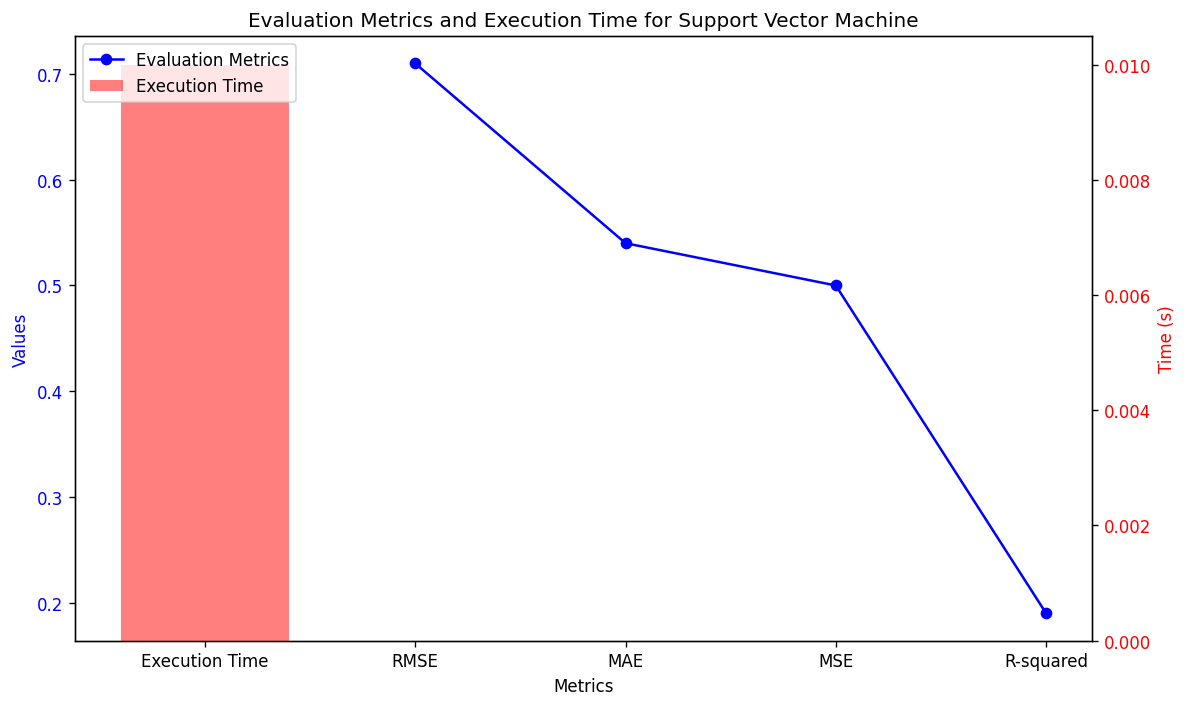

In [ ]:
# Các thông số đánh giá mô hình Support Vector Machine
rmse_svm = 0.71
mae_svm = 0.54
mse_svm = 0.50
r2_svm = 0.19
execution_time_svm = 0.01

# Tạo biểu đồ dòng và cột tương tự như trên
fig, ax1 = plt.subplots()
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared']
values = [rmse_svm, mae_svm, mse_svm, r2_svm]
execution_time = [execution_time_svm]

ax1.plot(metrics, values, marker='o', color='b', label='Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar('Execution Time', execution_time, color='r', alpha=0.5, label='Execution Time')
ax2.set_ylabel('Time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Evaluation Metrics and Execution Time for Support Vector Machine')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

6. Mô hình Polynomial Regression

In [ ]:
# Khởi tạo mô hình Polynomial Regression
start_time_poly = time.time()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()

# Huấn luyện mô hình Polynomial Regression
poly_model.fit(X_train_poly, y_train)
end_time_poly = time.time()

# Dự đoán trên tập kiểm tra sử dụng Polynomial Regression
y_pred_poly = poly_model.predict(X_test_poly)

# Đánh giá hiệu suất của Polynomial Regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)

# In kết quả đánh giá của Polynomial Regression
print('Polynomial Regression:')
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")
print(f"Execution Time: {end_time_poly - start_time_poly:.2f} seconds")
print()

Polynomial Regression:
RMSE: 0.66
MAE: 0.53
MSE: 0.44
R-squared: 0.29
Execution Time: 0.02 seconds



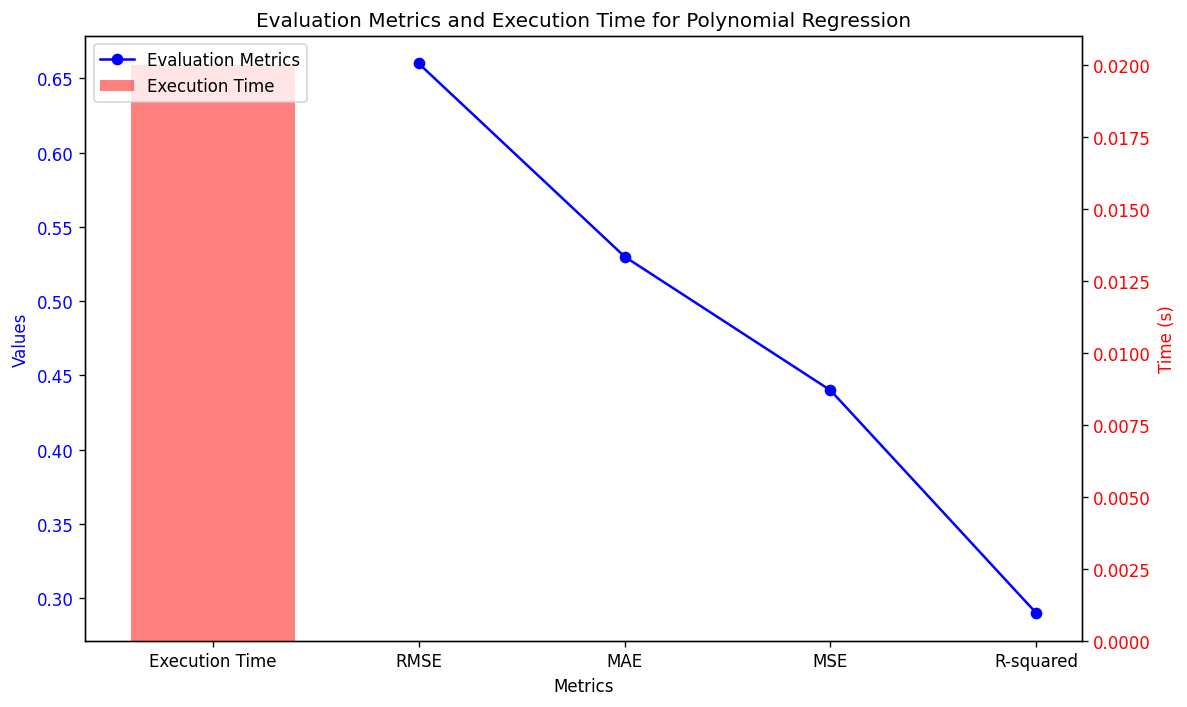

In [ ]:
# Các thông số đánh giá mô hình Polynomial Regression
rmse_poly = 0.66
mae_poly = 0.53
mse_poly = 0.44
r2_poly = 0.29
execution_time_poly = 0.02

# Tạo biểu đồ dòng và cột tương tự như trên
fig, ax1 = plt.subplots()
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared']
values = [rmse_poly, mae_poly, mse_poly, r2_poly]
execution_time = [execution_time_poly]

ax1.plot(metrics, values, marker='o', color='b', label='Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar('Execution Time', execution_time, color='r', alpha=0.5, label='Execution Time')
ax2.set_ylabel('Time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Evaluation Metrics and Execution Time for Polynomial Regression')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# VI. BIỂU ĐỒ SO SÁNH CÁC MÔ HÌNH

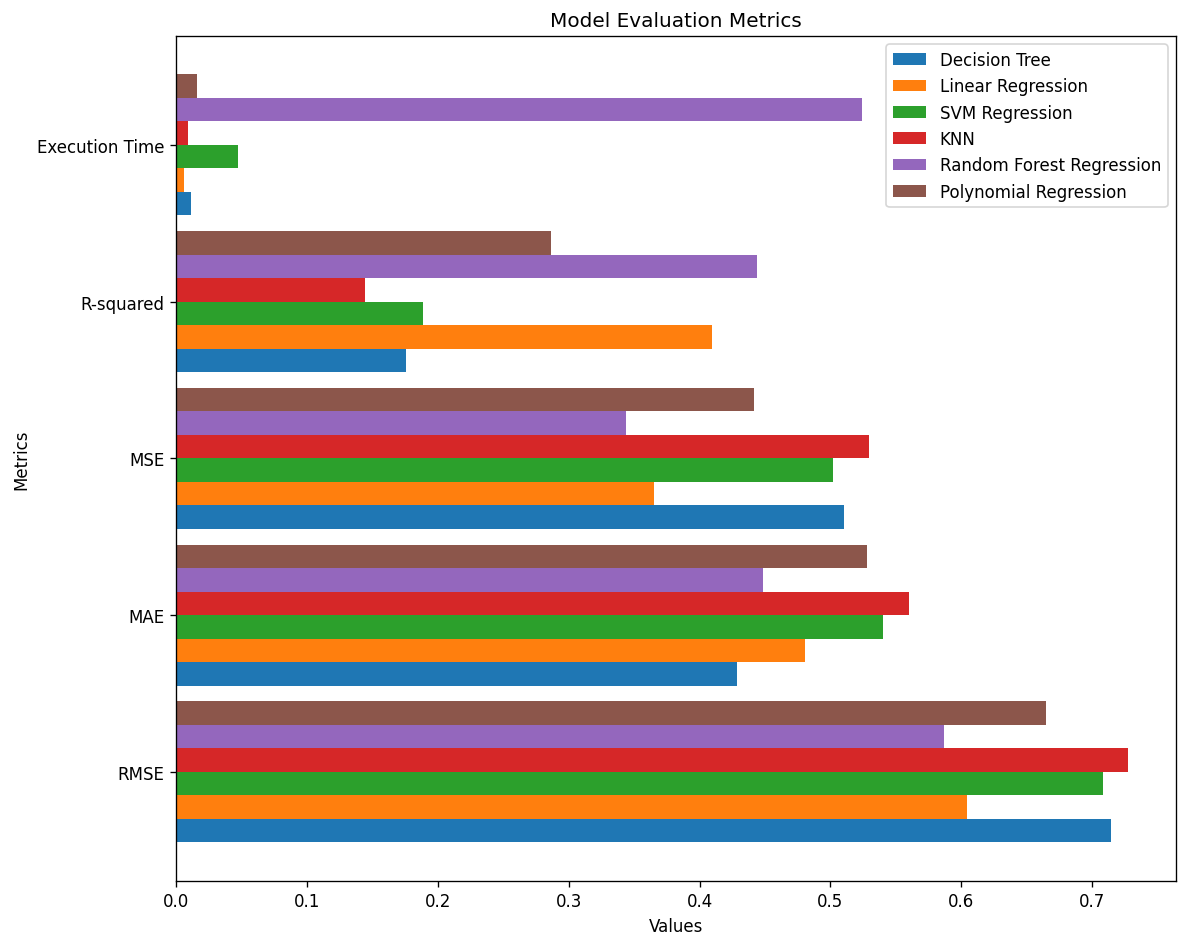

In [ ]:
# Định nghĩa các models và metrics
metrics = ['RMSE', 'MAE', 'MSE', 'R-squared', 'Execution Time']
models = ['Decision Tree', 'Linear Regression', 'SVM Regression', 'KNN', 'Random Forest Regression', 'Polynomial Regression']

# Định nghĩa giá trị cho từng metric và model (giả sử bạn đã tính toán giá trị này trước)
values = {
    'RMSE': [rmse_dtr, rmse_lr, rmse_svm, rmse_knn, rmse_rfr, rmse_poly],
    'MAE': [mae_dtr, mae_lr, mae_svm, mae_knn, mae_rfr, mae_poly],
    'MSE': [mse_dtr, mse_lr, mse_svm, mse_knn, mse_rfr, mse_poly],
    'R-squared': [r2_dtr, r2_lr, r2_svm, r2_knn, r2_rfr, r2_poly],
    'Execution Time': [end_time_dtr - start_time_dtr, end_time_lr - start_time_lr, end_time_svm - start_time_svm,
                       end_time_knn - start_time_knn, end_time_rfr - start_time_rfr, end_time_poly - start_time_poly]
}

# Đổi giá trị về dạng array để tạo biểu đồ
data = np.array([[values[metric][i] for metric in metrics] for i in range(len(models))])

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))  # Tạo một hình vẽ và trục
bar_width = 0.15  # Độ rộng của mỗi thanh bar
index = np.arange(len(metrics))  # Chuỗi số từ 0 đến (số metrics - 1)

# Duyệt qua từng model và tạo các thanh bar cho mỗi metric
for i, model in enumerate(models):
    ax.barh(index + i * bar_width, data[i], bar_width, label=model)

ax.set_ylabel('Metrics')  # Đặt nhãn cho trục y
ax.set_xlabel('Values')  # Đặt nhãn cho trục x
ax.set_title('Model Evaluation Metrics')  # Đặt tiêu đề cho biểu đồ
ax.set_yticks(index + bar_width * (len(models) - 1) / 2)  # Đặt vị trí của nhãn trục y
ax.set_yticklabels(metrics)  # Đặt nhãn cho trục y
ax.legend()  # Hiển thị chú thích

plt.tight_layout()  # Điều chỉnh bố cục
plt.show()  # Hiển thị biểu đồ

# VII. ĐƯA DỮ LIỆU MỚI VÀO ĐỂ KIỂM TRA DỰ ĐOÁN VÀ PHÂN LOẠI

In [ ]:
# Nhập các số liệu để dự đoán
new_data = pd.DataFrame({
    'fixed acidity': [5.6],
    'volatile acidity': [0.85],
    'citric acid': [0.05],
    'residual sugar': [1.4],
    'chlorides': [0.045],
    'free sulfur dioxide': [12],
    'total sulfur dioxide': [88],
    'density': [0.9924],
    'pH': [3.56],
    'sulphates': [0.82],
    'alcohol': [12.9]
})

# Chuẩn hóa dữ liệu cho dữ liệu mới
new_data_scaled = scaler.transform(new_data)

# Dự đoán kết quả sử dụng mô hình Random Forest
predicted_quality_rf = RFR.predict(new_data_scaled)

# Làm tròn kết quả lên hoặc xuống và giới hạn kết quả trong khoảng từ 0 đến 10
rounded_predicted_quality_rf = max(min(round(predicted_quality_rf[0]), 10), 0)

# Xác định phân loại chất lượng rượu dựa trên kết quả dự đoán
if rounded_predicted_quality_rf == 0:
    description = "Rượu không nên uống"
elif rounded_predicted_quality_rf <= 3:
    description = "Rượu uống hơi dở"
elif rounded_predicted_quality_rf <= 6:
    description = "Rượu uống hương vị ổn"
else:  # Điểm từ 7 đến 10
    description = "Rượu uống rất ngon"

print(f"Predicted Quality using Random Forest Regression (Rounded): {rounded_predicted_quality_rf}")
print(f"Description: {description}")

Predicted Quality using Random Forest Regression (Rounded): 5
Description: Rượu uống hương vị ổn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
